Importation des bibliothéques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Extraction des Datasets de chaque cellule 0, 1 et 2

In [2]:
df0 = pd.read_csv('3G_Cell_0.csv')
df1 = pd.read_csv('3G_Cell_1.csv')
df2 = pd.read_csv('3G_Cell_2.csv')
df = pd.read_csv('DataFrame_3G_After_Cleaning.csv')

Nous avons tracez les valeurs des KPIs "CS CSSR", "CS DROP Rate", "PS Call Setup SR", "PS DROP Rate 2" pour chaque cellule en fonction de l'index, pour mieux comprendre quelle sont les cellules les plus perturber pour chaque KPI 

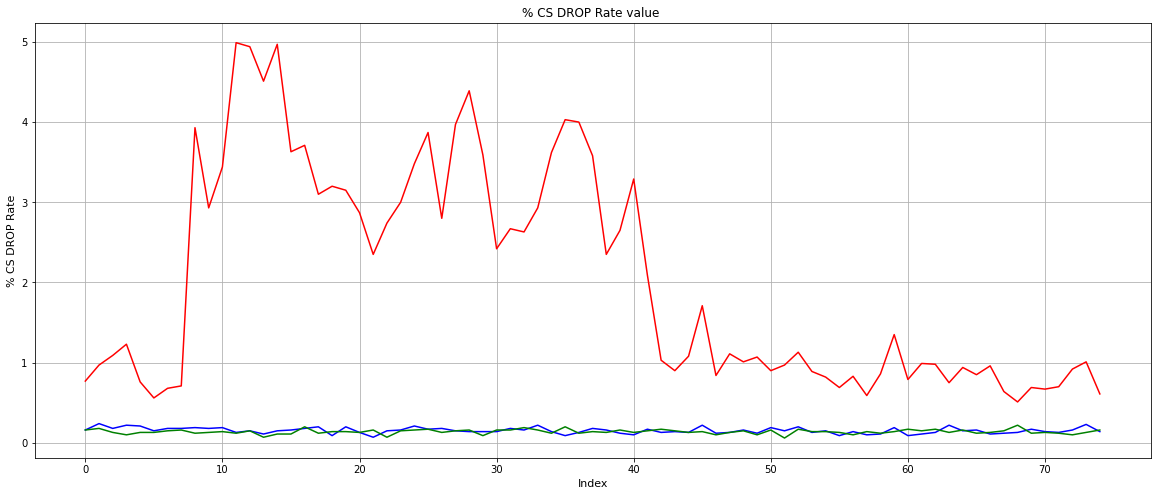

In [3]:
fig, ax = plt.subplots(figsize=(20,8))
cell_0 = plt.plot(df0["CS DROP Rate"], color='r')
cell_1 = plt.plot(df1["CS DROP Rate"], color='b')
cell_2 = plt.plot(df2["CS DROP Rate"], color='g')
ax.set_xlabel('Index', fontsize='11')
ax.set_ylabel('% CS DROP Rate', fontsize='11')
plt.title('% CS DROP Rate value ')
plt.grid()
plt.show()

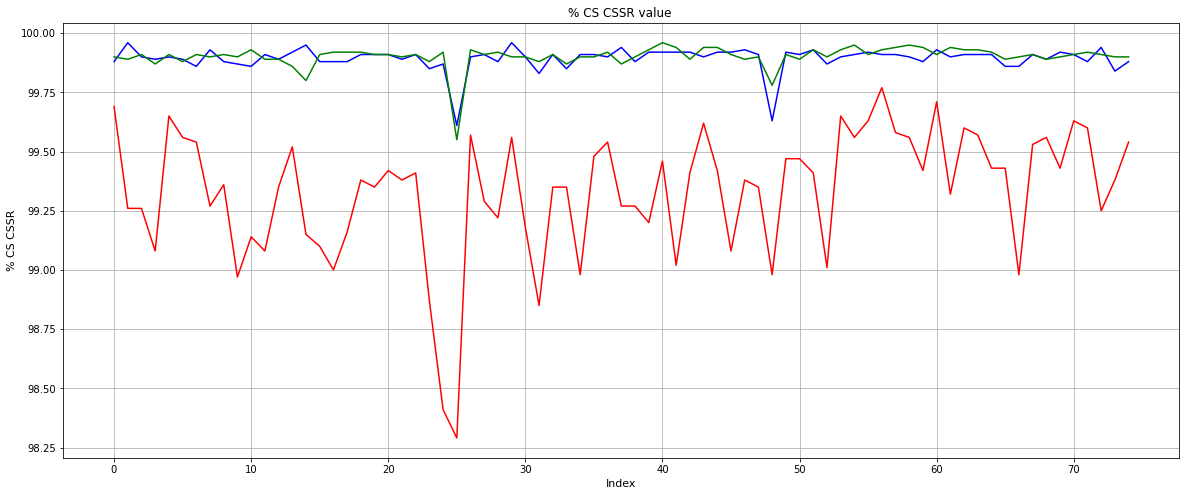

In [4]:
fig, ax = plt.subplots(figsize=(20,8))
cell_0 = plt.plot(df0["CS CSSR"], color='r')
cell_1 = plt.plot(df1["CS CSSR"], color='b')
cell_2 = plt.plot(df2["CS CSSR"], color='g')
ax.set_xlabel('Index', fontsize='11')
ax.set_ylabel('% CS CSSR', fontsize='11')
plt.title('% CS CSSR value ')
plt.grid()
plt.show()

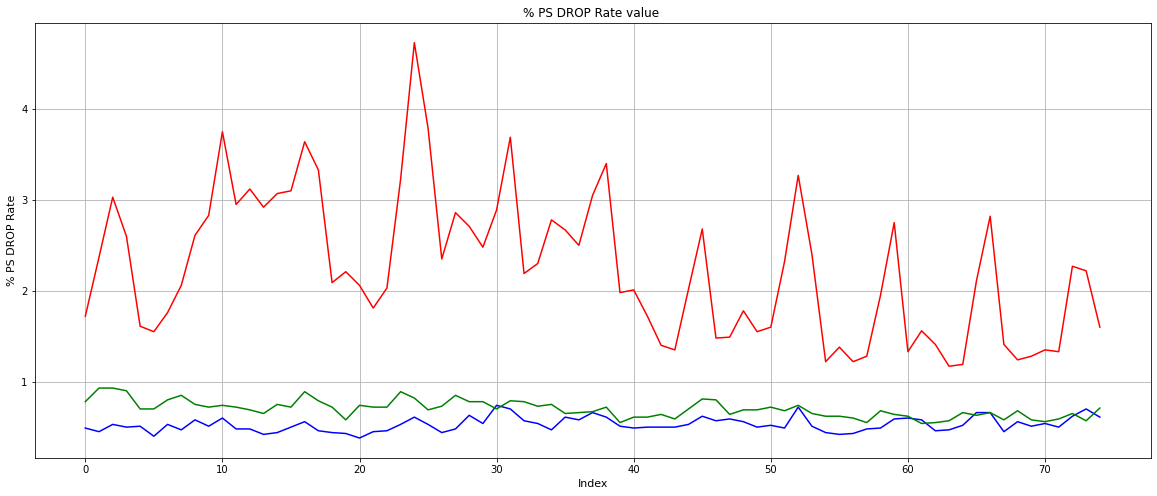

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
cell_0 = plt.plot(df0["PS DROP Rate 2"], color='r')
cell_1 = plt.plot(df1["PS DROP Rate 2"], color='b')
cell_2 = plt.plot(df2["PS DROP Rate 2"], color='g')
ax.set_xlabel('Index', fontsize='11')
ax.set_ylabel('% PS DROP Rate', fontsize='11')
plt.title('% PS DROP Rate value ')
plt.grid()
plt.show()

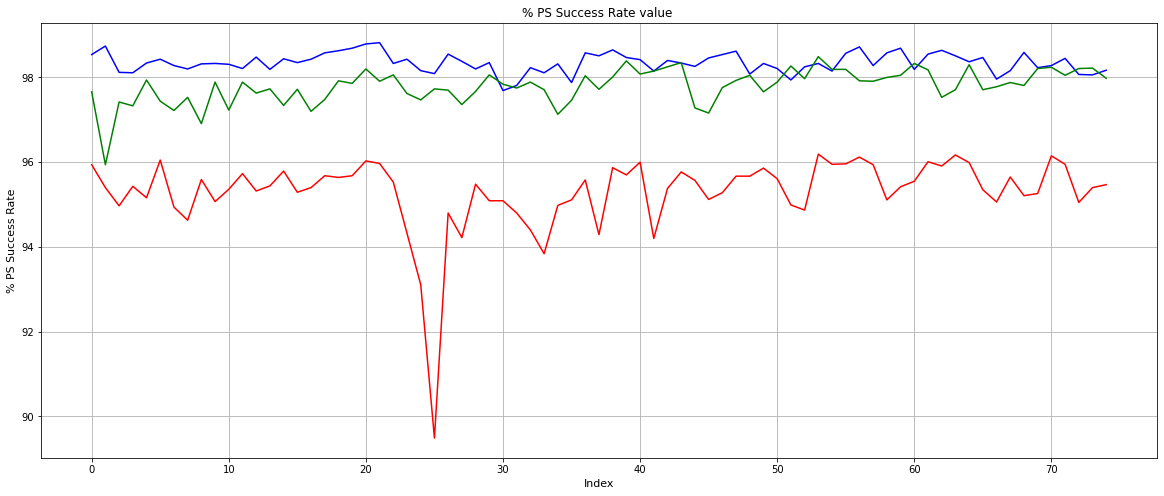

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
cell_0 = plt.plot(df0["PS Call Setup SR"], color='r')
cell_1 = plt.plot(df1["PS Call Setup SR"], color='b')
cell_2 = plt.plot(df2["PS Call Setup SR"], color='g')
ax.set_xlabel('Index', fontsize='11')
ax.set_ylabel('% PS Success Rate', fontsize='11')
plt.title('% PS Success Rate value ')
plt.grid()
plt.show()

On remarque que la cellule "Cell 0" la plus perturber, donc en continue notre travail en fonction de cette cellule

Pour la 1er pas, on commence avec l'algorithme KNN

In [7]:
from sklearn.neighbors import NearestNeighbors

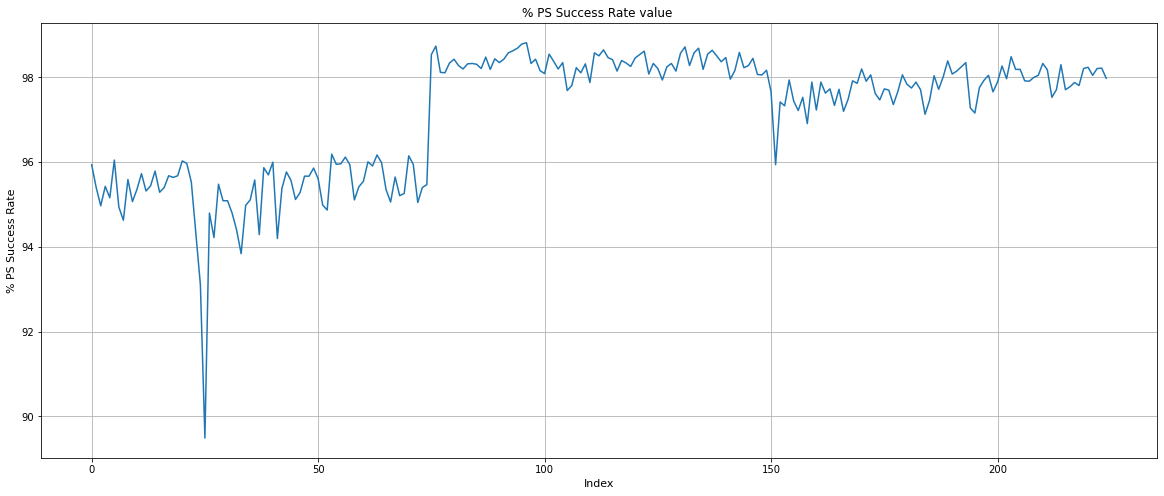

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
'''cell_0 = plt.plot(df0["PS Call Setup SR"], color='r')
cell_1 = plt.plot(df1["PS Call Setup SR"], color='b')
cell_2 = plt.plot(df2["PS Call Setup SR"], color='g')'''
Cell = plt.plot(df["PS Call Setup SR"])
ax.set_xlabel('Index', fontsize='11')
ax.set_ylabel('% PS Success Rate', fontsize='11')
plt.title('% PS Success Rate value ')
plt.grid()
plt.show()

In [9]:
nbrs = NearestNeighbors(n_neighbors=10)
nbrs.fit(df['PS Call Setup SR'].values.reshape(-1,1))

NearestNeighbors(n_neighbors=10)

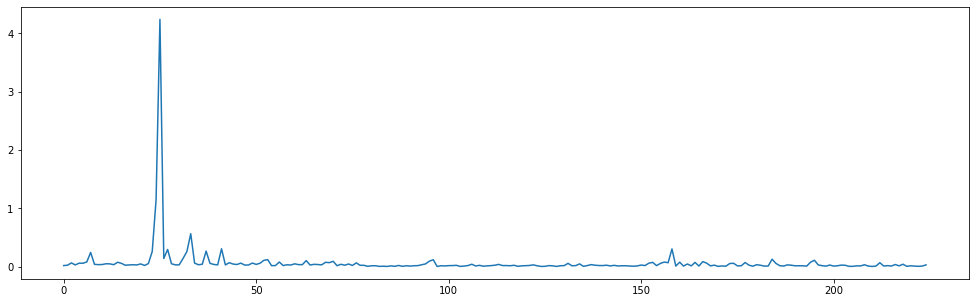

In [10]:
distances, indexes = nbrs.kneighbors(df['PS Call Setup SR'].values.reshape(-1,1))
plt.figure(figsize=(17,5))
plt.plot(distances.mean(axis=1))

In [11]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis=1)
distances_mean

0      0.021
1      0.027
2      0.067
3      0.032
4      0.062
       ...  
220    0.017
221    0.012
222    0.008
223    0.012
224    0.033
Length: 225, dtype: float64

In [12]:
distances_mean.describe()

count    225.000000
mean       0.068218
std        0.295348
min        0.006000
25%        0.017000
50%        0.027000
75%        0.050000
max        4.240000
dtype: float64

In [13]:
th = 0.060
th_v = 96
outlier_index = np.where((distances_mean > th))
outlier_index

(array([  2,   4,   5,   6,   7,  14,  23,  24,  25,  26,  27,  31,  32,
         33,  34,  37,  41,  43,  46,  49,  51,  52,  53,  56,  63,  68,
         69,  70,  76,  95,  96, 152, 153, 156, 157, 158, 160, 164, 166,
        167, 174, 177, 184, 194, 195, 212], dtype=int64),)

In [14]:
outlier_values = df['PS Call Setup SR'].iloc[outlier_index]
outlier_values

2      94.97
4      95.16
5      96.05
6      94.94
7      94.63
14     95.79
23     94.32
24     93.11
25     89.49
26     94.80
27     94.22
31     94.80
32     94.40
33     93.84
34     94.98
37     94.29
41     94.20
43     95.77
46     95.28
49     95.86
51     94.99
52     94.87
53     96.19
56     96.12
63     96.17
68     95.21
69     95.26
70     96.15
76     98.74
95     98.79
96     98.82
152    97.42
153    97.33
156    97.22
157    97.53
158    96.91
160    97.23
164    97.34
166    97.20
167    97.48
174    97.47
177    97.36
184    97.13
194    97.28
195    97.16
212    97.53
Name: PS Call Setup SR, dtype: float64

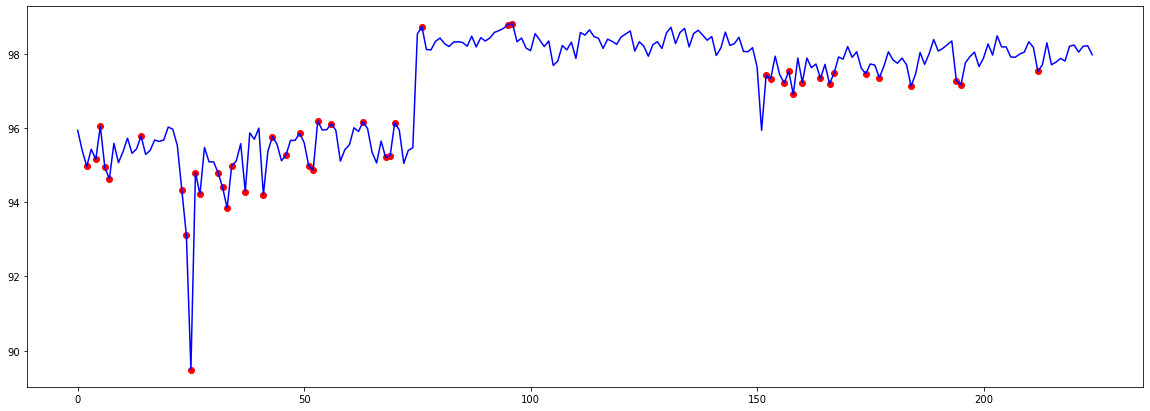

In [15]:
plt.figure(figsize=(20,7))
plt.plot(df['PS Call Setup SR'], color="b")
plt.scatter(outlier_index, outlier_values, color="r")

Isolation Forest

In [16]:
import plotly.express as px
#import altair as alt
from sklearn.ensemble import IsolationForest
import plotly.graph_objects as go

In [29]:
x = df['PS Call Setup SR'].apply(lambda x: [x]).to_list()
iso_forest = IsolationForest(n_estimators=100,
                        max_samples="auto",
                        contamination=0.025,
                        random_state=42)
iso_forest.fit(x)
y_pred = iso_forest.predict(x)
y_pred = [1 if x == -1 else 0 for x in y_pred]
y_pred[:10]
#point that are 1 are outliers

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
df["anomaly"] = y_pred
df.head()

,index,Date,RBS Id,TRAFFIC PS(DL+UL)(Gbits),HSDPA Data Volume,HSUPA Data Volume,Cell Traffic Volume DL Speech (Erlang),CS CSSR,CS DROP Rate,PS Call Setup SR,PS DROP Rate 2,Availability,Soft Handover,Irat CS Handover SR,IRAT PS 2,throughput,anomaly
0,0,16-12-21,0,74.39,66.74,7.65,156.83,99.69,0.77,95.94,1.72,100.0,99.86,93.94,100.00,755.79,0
1,1,17-12-21,0,65.41,58.40,7.01,107.82,99.26,0.97,95.40,2.37,100.0,99.67,97.98,100.00,755.79,0
2,2,18-12-21,0,65.67,58.93,6.74,94.38,99.26,1.09,94.97,3.03,100.0,99.57,96.43,0.00,755.79,0
3,3,19-12-21,0,57.79,50.91,6.87,101.48,99.08,1.23,95.43,2.60,100.0,99.72,93.14,100.00,755.79,0
4,4,20-12-21,0,79.74,70.04,9.69,163.22,99.65,0.76,95.16,1.61,100.0,99.86,94.23,66.67,755.79,0


In [31]:
iso_anomaly_df = pd.DataFrame(df)
iso_anomaly_df = iso_anomaly_df.loc[iso_anomaly_df['anomaly'] == 1]
iso_anomaly_df.head()


,index,Date,RBS Id,TRAFFIC PS(DL+UL)(Gbits),HSDPA Data Volume,HSUPA Data Volume,Cell Traffic Volume DL Speech (Erlang),CS CSSR,CS DROP Rate,PS Call Setup SR,PS DROP Rate 2,Availability,Soft Handover,Irat CS Handover SR,IRAT PS 2,throughput,anomaly
24,24,01-09-22,0,72.46,61.93,10.53,89.79,98.41,3.48,93.11,4.73,96.95,98.69,92.60,100.00,490.41,1
25,25,01-10-22,0,64.63,57.21,7.42,110.09,98.29,3.87,89.49,3.79,97.88,99.60,95.49,100.00,670.35,1
33,33,18-01-22,0,66.30,57.72,8.58,167.07,99.35,2.93,93.84,2.30,98.30,99.77,95.05,66.67,667.74,1
95,95,01-05-22,1,92.01,81.54,10.48,655.66,99.91,0.13,98.79,0.38,100.00,100.10,95.94,66.67,852.01,1
96,96,01-06-22,1,95.61,84.40,11.21,652.81,99.89,0.07,98.82,0.45,100.00,100.17,96.54,66.67,818.20,1


In [32]:
fig = px.line(df,x='index', y='PS Call Setup SR', title='Unsupervised anomaly detection in PS Call Setup SR')
fig.add_trace(go.Scatter(x=iso_anomaly_df["index"].to_list(), y=iso_anomaly_df["PS Call Setup SR"].to_list(),
                            mode='markers', name='anomalies'))
fig.update_xaxes(rangeslider_visible=True)
fig

Local Outlier Factor

In [33]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
y_pred = lof.fit_predict(x)
y_pred = [1 if x == -1 else 0 for x in y_pred]
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [34]:
df["anomaly"] = y_pred
df.head()

,index,Date,RBS Id,TRAFFIC PS(DL+UL)(Gbits),HSDPA Data Volume,HSUPA Data Volume,Cell Traffic Volume DL Speech (Erlang),CS CSSR,CS DROP Rate,PS Call Setup SR,PS DROP Rate 2,Availability,Soft Handover,Irat CS Handover SR,IRAT PS 2,throughput,anomaly
0,0,16-12-21,0,74.39,66.74,7.65,156.83,99.69,0.77,95.94,1.72,100.0,99.86,93.94,100.00,755.79,0
1,1,17-12-21,0,65.41,58.40,7.01,107.82,99.26,0.97,95.40,2.37,100.0,99.67,97.98,100.00,755.79,0
2,2,18-12-21,0,65.67,58.93,6.74,94.38,99.26,1.09,94.97,3.03,100.0,99.57,96.43,0.00,755.79,0
3,3,19-12-21,0,57.79,50.91,6.87,101.48,99.08,1.23,95.43,2.60,100.0,99.72,93.14,100.00,755.79,0
4,4,20-12-21,0,79.74,70.04,9.69,163.22,99.65,0.76,95.16,1.61,100.0,99.86,94.23,66.67,755.79,0


In [35]:
lof_anomaly_df = pd.DataFrame(df)
lof_anomaly_df = lof_anomaly_df.loc[lof_anomaly_df['anomaly'] == 1]
lof_anomaly_df.head()

,index,Date,RBS Id,TRAFFIC PS(DL+UL)(Gbits),HSDPA Data Volume,HSUPA Data Volume,Cell Traffic Volume DL Speech (Erlang),CS CSSR,CS DROP Rate,PS Call Setup SR,PS DROP Rate 2,Availability,Soft Handover,Irat CS Handover SR,IRAT PS 2,throughput,anomaly
7,7,23-12-21,0,86.34,76.22,10.12,157.31,99.27,0.71,94.63,2.06,100.00,99.54,96.89,0.00,672.96,1
23,23,01-08-22,0,76.68,67.55,9.14,123.39,98.87,3.00,94.32,3.23,97.75,99.42,96.14,40.00,628.69,1
24,24,01-09-22,0,72.46,61.93,10.53,89.79,98.41,3.48,93.11,4.73,96.95,98.69,92.60,100.00,490.41,1
25,25,01-10-22,0,64.63,57.21,7.42,110.09,98.29,3.87,89.49,3.79,97.88,99.60,95.49,100.00,670.35,1
26,26,01-11-22,0,71.53,62.88,8.65,150.74,99.57,2.80,94.80,2.35,98.64,99.83,95.09,66.67,738.61,1


In [36]:

fig = px.line(df, x='index', y='PS Call Setup SR', title='Unsupervised anomaly detection in PS Call Setup SR')
fig.add_trace(go.Scatter(x=lof_anomaly_df["index"].to_list(), y=lof_anomaly_df["PS Call Setup SR"].to_list(),
                        mode='markers', name='anomalies'))
fig.update_xaxes(rangeslider_visible=True)
fig

OneClassSVM

In [37]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='linear',
                     gamma='scale',
                     nu=0.1)
y_pred = ocsvm.fit_predict(x)
y_pred = [1 if x == -1 else 0 for x in y_pred]
y_pred[:10]


[0, 0, 1, 0, 0, 0, 1, 1, 0, 1]

In [38]:
df["anomaly"] = y_pred
df.head()

,index,Date,RBS Id,TRAFFIC PS(DL+UL)(Gbits),HSDPA Data Volume,HSUPA Data Volume,Cell Traffic Volume DL Speech (Erlang),CS CSSR,CS DROP Rate,PS Call Setup SR,PS DROP Rate 2,Availability,Soft Handover,Irat CS Handover SR,IRAT PS 2,throughput,anomaly
0,0,16-12-21,0,74.39,66.74,7.65,156.83,99.69,0.77,95.94,1.72,100.0,99.86,93.94,100.00,755.79,0
1,1,17-12-21,0,65.41,58.40,7.01,107.82,99.26,0.97,95.40,2.37,100.0,99.67,97.98,100.00,755.79,0
2,2,18-12-21,0,65.67,58.93,6.74,94.38,99.26,1.09,94.97,3.03,100.0,99.57,96.43,0.00,755.79,1
3,3,19-12-21,0,57.79,50.91,6.87,101.48,99.08,1.23,95.43,2.60,100.0,99.72,93.14,100.00,755.79,0
4,4,20-12-21,0,79.74,70.04,9.69,163.22,99.65,0.76,95.16,1.61,100.0,99.86,94.23,66.67,755.79,0


In [39]:
ocsvm_anomaly_df = pd.DataFrame(df)
ocsvm_anomaly_df = ocsvm_anomaly_df.loc[ocsvm_anomaly_df['anomaly'] == 1]
ocsvm_anomaly_df.head()

,index,Date,RBS Id,TRAFFIC PS(DL+UL)(Gbits),HSDPA Data Volume,HSUPA Data Volume,Cell Traffic Volume DL Speech (Erlang),CS CSSR,CS DROP Rate,PS Call Setup SR,PS DROP Rate 2,Availability,Soft Handover,Irat CS Handover SR,IRAT PS 2,throughput,anomaly
2,2,18-12-21,0,65.67,58.93,6.74,94.38,99.26,1.09,94.97,3.03,100.00,99.57,96.43,0.00,755.79,1
6,6,22-12-21,0,89.15,78.33,10.82,142.73,99.54,0.68,94.94,1.76,100.00,99.85,96.54,0.00,815.16,1
7,7,23-12-21,0,86.34,76.22,10.12,157.31,99.27,0.71,94.63,2.06,100.00,99.54,96.89,0.00,672.96,1
9,9,25-12-21,0,60.16,52.90,7.26,118.15,98.97,2.93,95.07,2.83,98.01,99.52,95.97,66.67,645.25,1
23,23,01-08-22,0,76.68,67.55,9.14,123.39,98.87,3.00,94.32,3.23,97.75,99.42,96.14,40.00,628.69,1


In [40]:
fig = px.line(df, x='index', y='PS Call Setup SR', title='Unsupervise anomaly detection in PS Call Setup SR')
fig.add_trace(go.Scatter(x=ocsvm_anomaly_df["index"].to_list(),
                        y=ocsvm_anomaly_df["PS Call Setup SR"].to_list(),
                        mode='markers',
                        name='anomaly'))
fig.update_xaxes(rangeslider_visible=True)
fig